#### Starting Setup

In [1]:
pip install --no-binary :all: aesara

### Correlation Matrix

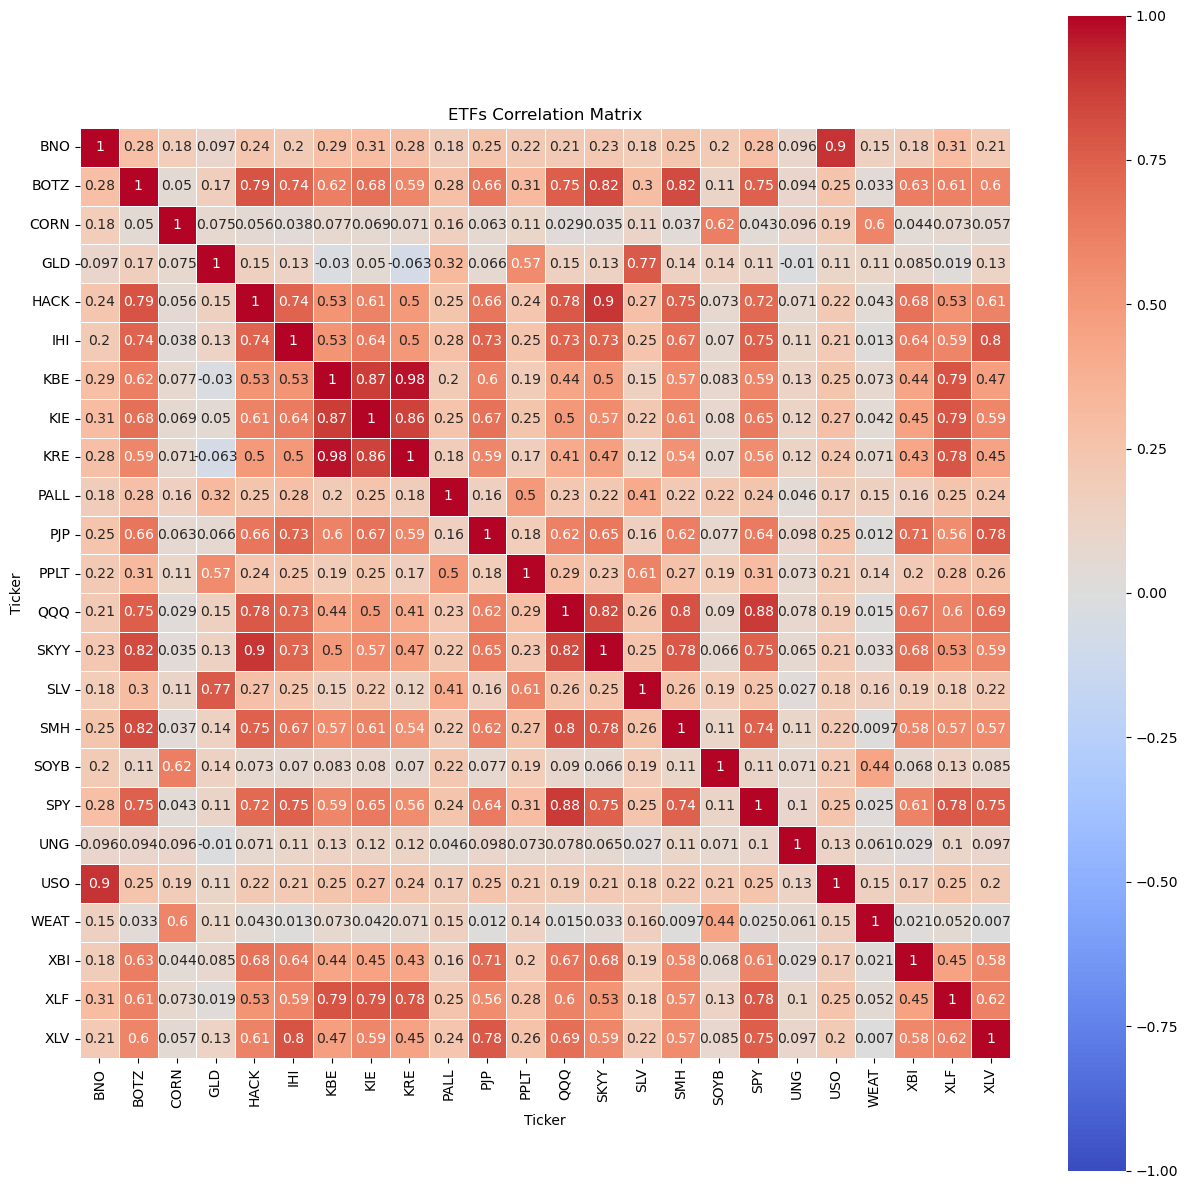

NameError: name 'sectors' is not defined

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib. pyplot as plt

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Calculate daily returns for the whole dataset
daily_returns = df.pivot(index='Date', columns='Ticker', values='Close').pct_change().dropna()

# Correlation matrix for ETFs
etf_corr = daily_returns.corr()

# Plot the correlation matrix for ETFs
plt.figure(figsize=(15,15))
sns.heatmap(etf_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('ETFs Correlation Matrix')
plt.show()

# Calculate sector-wise daily returns
sector_daily_returns = pd.DataFrame(index=daily_returns.index, columns=sectors)

for sector in sectors:
    tickers_in_sector = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector]
    sector_daily_returns[sector] = daily_returns[tickers_in_sector].mean(axis=1)  # Taking mean of ETFs in the sector

# Correlation matrix for sectors
sector_corr = sector_daily_returns.corr()

# Plot the correlation matrix for sectors
plt.figure(figsize=(10,10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Sectors Correlation Matrix')
plt.show()


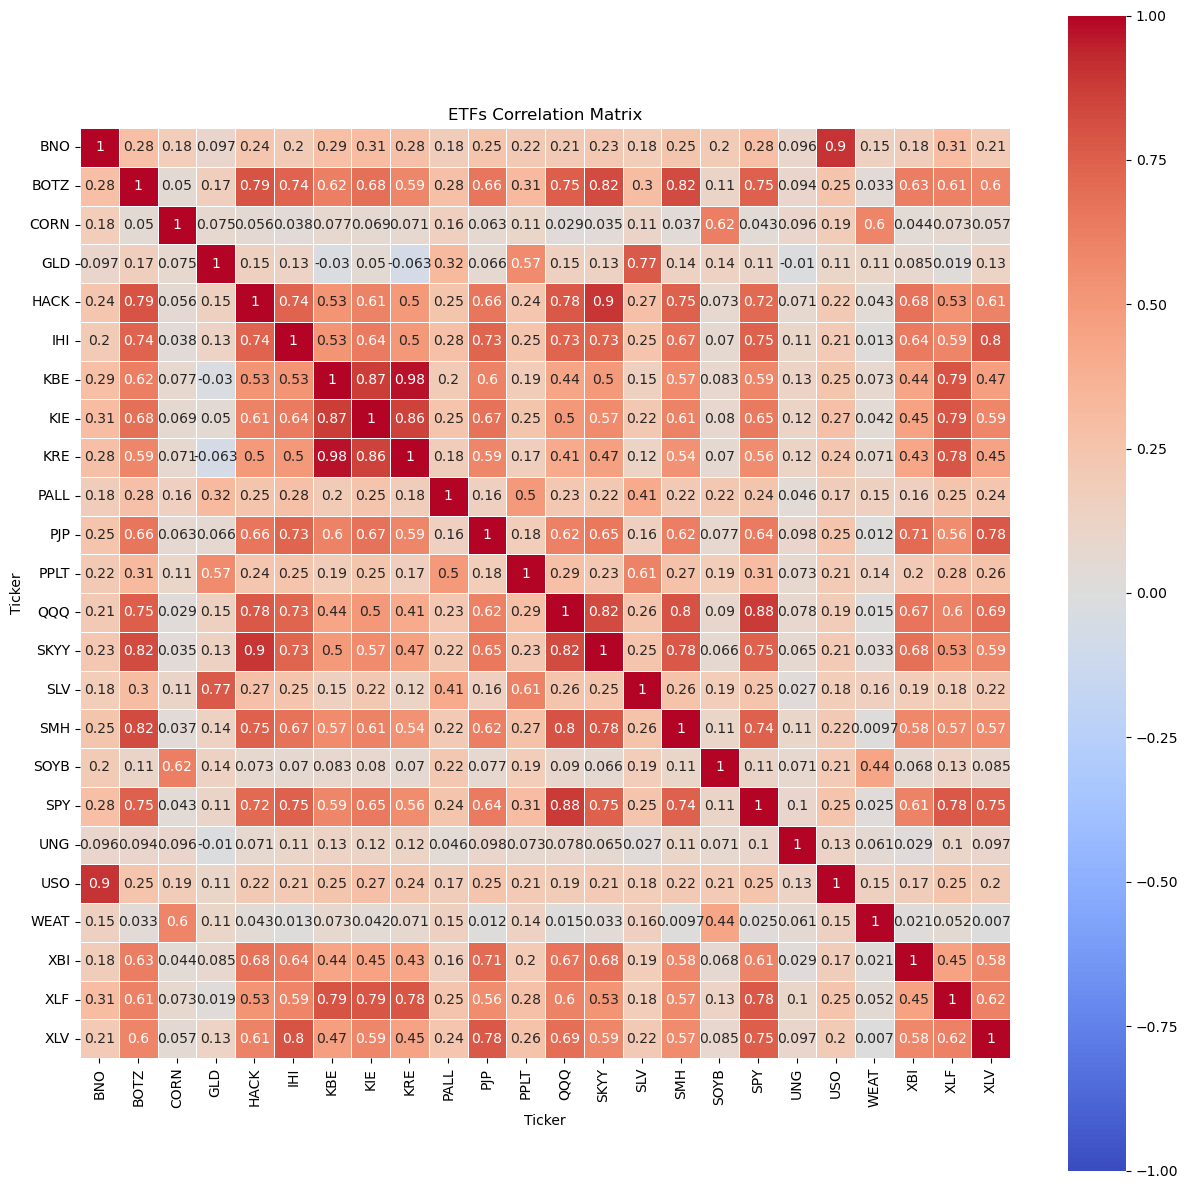

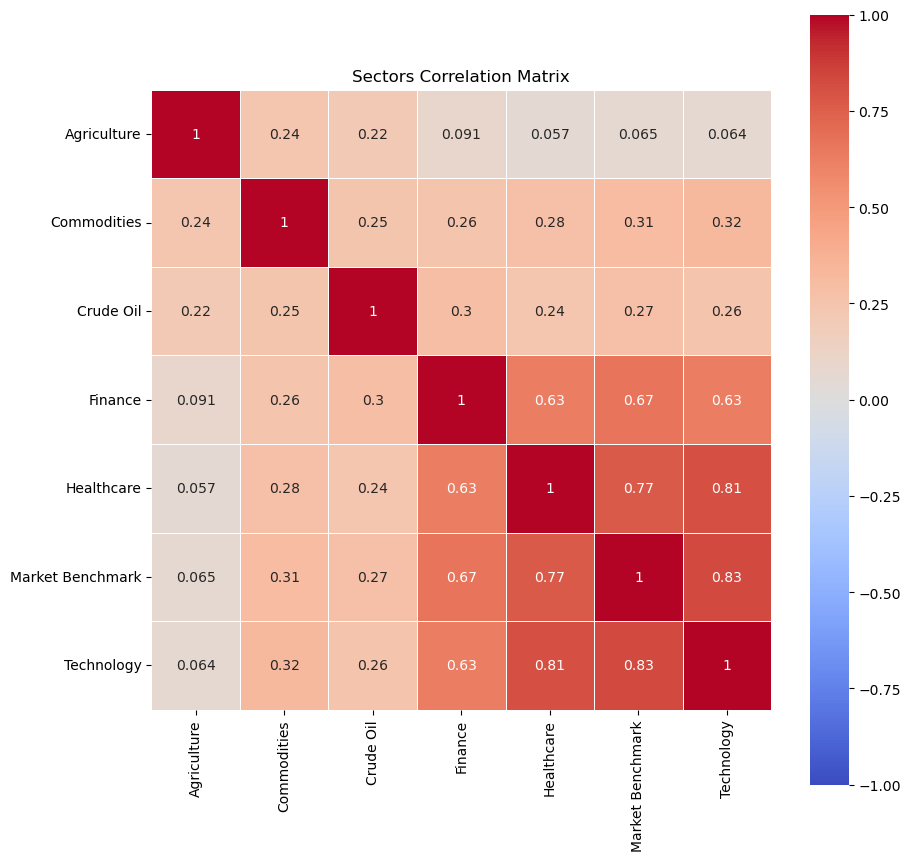

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Calculate daily returns for the whole dataset
daily_returns = df.pivot(index='Date', columns='Ticker', values='Close').pct_change().dropna()

# Correlation matrix for ETFs
etf_corr = daily_returns.corr()

# Plot the correlation matrix for ETFs
plt.figure(figsize=(15,15))
sns.heatmap(etf_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('ETFs Correlation Matrix')
plt.show()

# Define sectors and ticker_to_sector variables
sectors = df['Sector'].unique()
ticker_to_sector = dict(zip(df['Ticker'], df['Sector']))

# Calculate sector-wise daily returns
sector_daily_returns = pd.DataFrame(index=daily_returns.index)

for sector in sectors:
    tickers_in_sector = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector]
    sector_daily_returns[sector] = daily_returns[tickers_in_sector].mean(axis=1)  # Taking mean of ETFs in the sector

# Correlation matrix for sectors
sector_corr = sector_daily_returns.corr()

# Plot the correlation matrix for sectors
plt.figure(figsize=(10,10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Sectors Correlation Matrix')
plt.show()

In [ ]:
sectors_tickers = {
        "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
        "Agriculture": ["CORN", "SOYB", "WEAT"],
        "Crude Oil": ["USO", "BNO"],
        "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
        "Finance": ["XLF","KBE", "KRE", "KIE"],
        "Healthcare": ["XLV", "XBI", "PJP","IHI"],
        "Market Benchmark": ["SPY"]
        # Add more sectors and their tickers here
    }

C:\Users\saide\AppData\Local\Temp\ipykernel_7984\2864298455.py:22: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities, alpha_etf_Agriculture, alpha_etf_Crude Oil, alpha_etf_Technology, alpha_etf_Finance, alpha_etf_Healthcare, alpha_etf_Market Benchmark]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 2793 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 942 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'alpha_global'}>,
        <Axes: title={'center': 'alpha_global'}>],
       [<Axes: title={'center': 'alpha_sector'}>,
        <Axes: title={'center': 'alpha_sector'}>],
       [<Axes: title={'center': 'alpha_etf_Commodities'}>,
        <Axes: title={'center': 'alpha_etf_Commodities'}>],
       [<Axes: title={'center': 'alpha_etf_Agriculture'}>,
        <Axes: title={'center': 'alpha_etf_Agriculture'}>],
       [<Axes: title={'center': 'alpha_etf_Crude Oil'}>,
        <Axes: title={'center': 'alpha_etf_Crude Oil'}>],
       [<Axes: title={'center': 'alpha_etf_Technology'}>,
        <Axes: title={'center': 'alpha_etf_Technology'}>],
       [<Axes: title={'center': 'alpha_etf_Finance'}>,
        <Axes: title={'center': 'alpha_etf_Finance'}>],
       [<Axes: title={'center': 'alpha_etf_Healthcare'}>,
        <Axes: title={'center': 'alpha_etf_Healthcare'}>],
       [<Axes: title={'center': 'alpha_etf_Market Benchmark'}>,
        <Axes: title={'center': 'alp

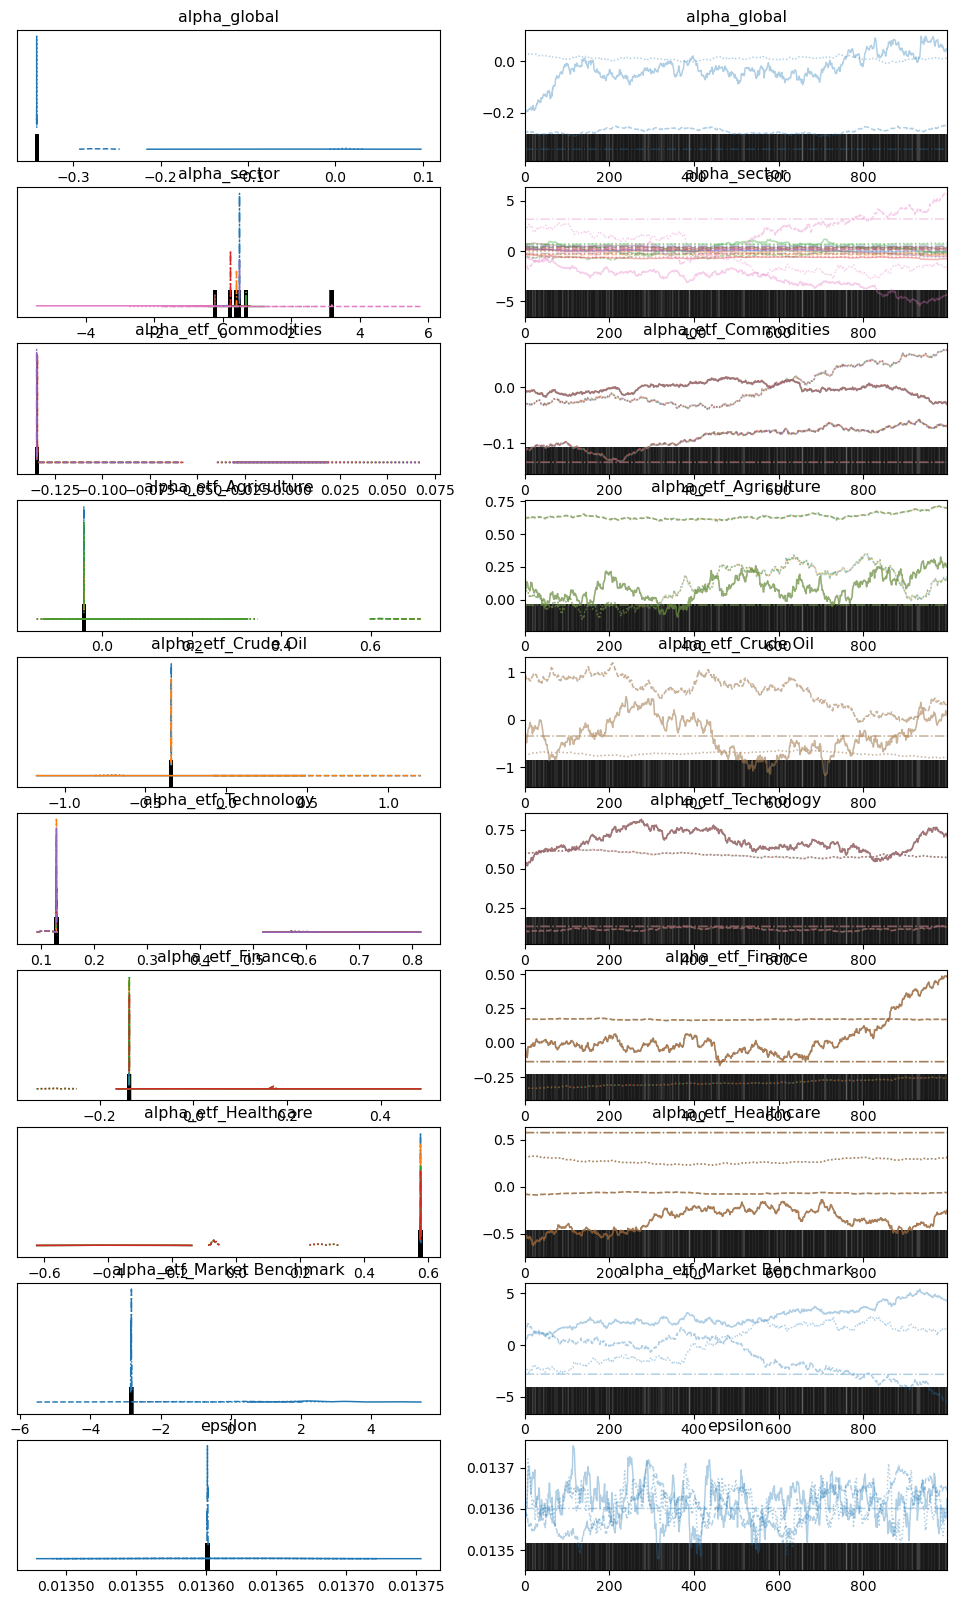

In [9]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az


# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}

with pm.Model() as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    obs = []
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            obs.append(pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data))
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Posterior Analysis
az.plot_trace(trace)


In [16]:
pip install --upgrade arviz

Note: you may need to restart the kernel to use updated packages.


In [15]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,log_return,daily_return,volatility,momentum,Direction,MA_50,MA_100,MA_200,bci,cci,cli,long_term_ir,short_term_ir
count,43824,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,4.382400e+04,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2020-07-01 12:00:00,79.447525,80.094649,78.722484,79.430348,77.524156,1.119298e+07,0.000130,0.000223,0.011623,0.005093,0.512778,79.118215,78.787490,78.056709,100.481762,99.627084,99.645119,2.057829,1.445504
min,2018-01-01 00:00:00,4.880000,4.960000,4.830000,4.860000,4.860000,2.800000e+03,-0.142914,-0.133171,0.000003,-0.603352,0.000000,5.110933,5.211500,5.339500,98.167170,96.134230,92.625770,0.620000,0.090000
25%,2019-04-02 00:00:00,24.580000,24.858751,24.290001,24.605000,23.938191,1.939000e+05,-0.004862,-0.004850,0.007079,-0.027187,0.000000,24.527129,24.557175,24.330281,99.528110,98.357870,98.999913,1.416774,0.161613
50%,2020-07-01 12:00:00,51.880000,52.335834,51.345278,51.827500,49.170349,1.700900e+06,0.000258,0.000258,0.010091,0.008192,1.000000,51.895616,51.969188,51.698338,100.765445,99.740621,99.836504,1.856774,1.667621
75%,2021-10-01 00:00:00,95.599998,96.421665,94.639999,95.489998,94.874357,8.810000e+06,0.005337,0.005351,0.014318,0.039724,1.000000,94.783200,94.528308,94.180950,101.391361,101.385000,100.784284,2.876774,2.248387
max,2022-12-31 00:00:00,479.220001,479.980011,476.059998,477.709991,464.923401,2.189132e+08,0.190983,0.210439,0.073483,0.597878,1.000000,466.792103,463.259501,453.177159,101.996100,101.642500,101.314000,3.980000,4.508387
std,NaN,83.724420,84.297746,83.059088,83.708333,81.514525,2.327038e+07,0.013615,0.013605,0.006821,0.066887,0.499842,83.265191,82.815795,81.847351,1.049672,1.783538,1.531893,0.889272,1.144198


In [16]:
import pandas as pd

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel('etf_ei_merged_data.xlsx')

# Create a dictionary to store the unique values for each column
unique_values = {}

# Iterate over the columns in the DataFrame
for column in df.columns:

    # Get the unique values in the column
    unique_values[column] = df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f'Column: {column}')
    print(f'Number of unique values: {len(values)}')
    print(f'Unique values: {values}')
    print('\n')

Column: Date
Number of unique values: 1826
Unique values: <DatetimeArray>
['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00',
 '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
 '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00',
 '2018-01-10 00:00:00',
 ...
 '2022-12-22 00:00:00', '2022-12-23 00:00:00', '2022-12-24 00:00:00',
 '2022-12-25 00:00:00', '2022-12-26 00:00:00', '2022-12-27 00:00:00',
 '2022-12-28 00:00:00', '2022-12-29 00:00:00', '2022-12-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 1826, dtype: datetime64[ns]


Column: Open
Number of unique values: 27121
Unique values: [ 16.75        17.97500086   6.         ... 380.64001465 263.61999512
 100.34999847]


Column: High
Number of unique values: 27677
Unique values: [ 16.85999966  18.00000048   6.07499993 ... 266.41000366  57.63000107
 101.60500336]


Column: Low
Number of unique values: 27513
Unique values: [ 16.74499989  17.7949996    5.99000001 ...  58.34999847 378.4299

In [ ]:
pip install arviz

In [1]:
pip install "arviz[all]"

  Obtaining dependency information for netcdf4 from https://files.pythonhosted.org/packages/f0/ef/39f1e32c623abbcff8fef81e484abafc74779388144540b804d96f0657cc/netCDF4-1.6.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     --------------------------------------- 0.0/18.5 MB 217.9 kB/s eta 0:01:25
     --------------------------------------- 0.1/18.5 MB 363.1 kB/s eta 0:00:51
     --------------------------------------- 0.1/18.5 MB 504.4 kB/s eta 0:00:37
     --------------------------------------- 0.2/18.5 MB 701.4 kB/s eta 0:00:27
      -------------------------------------- 0.3/18.5 MB 980.4 kB/s eta 0:00:19
      -------------------------------------- 0.3/18.5 MB 905.4 kB/s eta 0:00:21
      --------------------------------------- 0.4/18.5 MB 1.0 MB/s eta 0:00:18
      -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}
with pm.Model() as model:
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers))
    
    # Include economic indicators as covariates (optional but can improve model)
    bci_coef = pm.Normal('bci_coef', mu=0, sigma=1)
    cci_coef = pm.Normal('cci_coef', mu=0, sigma=1)
    cli_coef = pm.Normal('cli_coef', mu=0, sigma=1)
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers))
        
        for j, ticker in enumerate(tickers):
            subset_data = df[df['Ticker'] == ticker]
            mu = (alpha_global + alpha_sector[i] + alpha_etf[j] +
                  bci_coef * subset_data['bci'] + 
                  cci_coef * subset_data['cci'] + 
                  cli_coef * subset_data['cli'])
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=subset_data['daily_return'])
    
    # Sampling
    trace = pm.sample(1000, tune=500, target_accept=0.95)

# Convert the PyMC3 trace to an ArviZ InferenceData object
idata = az.from_pymc3(trace)

# Visualizing the trace
az.plot_trace(idata)

# Summary statistics
summary = az.summary(idata)
print(summary)


C:\Users\saide\AppData\Local\Temp\ipykernel_32084\1699316296.py:19: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\multipledispatch\dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[object, ConstrainedVar, Mapping], [ConstrainedVar, Var, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 4720 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1776 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


AttributeError: module 'arviz' has no attribute 'from_pymc3'

                                mean     sd  hdi_3%  hdi_97%  mcse_mean  \
alpha_global                   0.261  0.508  -0.473    0.834      0.253   
alpha_sector[0]               -0.150  0.394  -0.786    0.255      0.196   
alpha_sector[1]                0.391  0.183   0.120    0.630      0.087   
alpha_sector[2]                0.123  0.422  -0.318    0.588      0.210   
alpha_sector[3]                0.110  0.194  -0.215    0.275      0.096   
alpha_sector[4]                0.309  0.307  -0.014    0.777      0.153   
alpha_sector[5]               -0.293  0.201  -0.529   -0.007      0.099   
alpha_sector[6]                0.028  0.335  -0.364    0.476      0.166   
bci_coef                      -0.001  0.005  -0.009    0.006      0.003   
cci_coef                      -0.000  0.001  -0.002    0.002      0.001   
cli_coef                      -0.000  0.001  -0.002    0.001      0.001   
alpha_etf_Commodities[0]       0.086  0.357  -0.363    0.505      0.178   
alpha_etf_Commodities[1] 

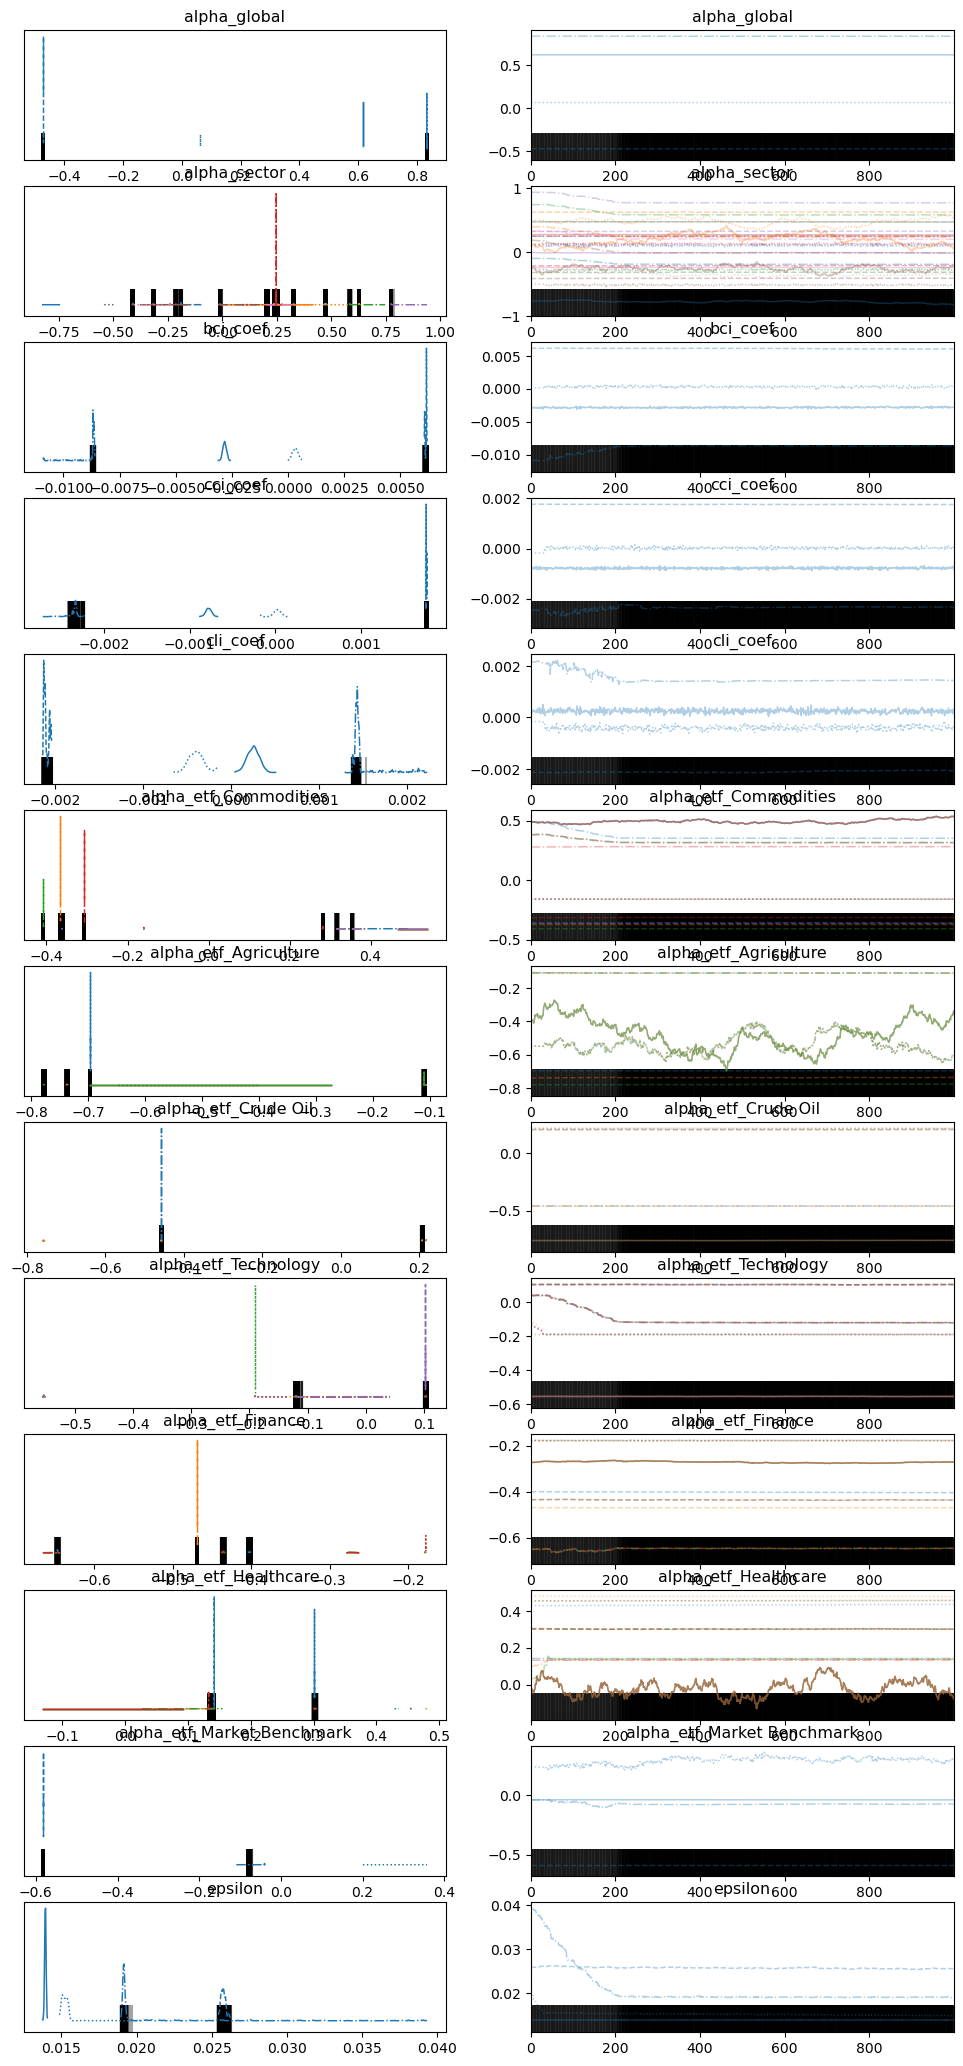

In [12]:
# Traceplot
pm.plot_trace(trace)

# Summary
summary = pm.summary(trace)
print(summary)

#### Improving sampling, intialization and diagnostics

In [13]:
import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
    "Agriculture": ["CORN", "SOYB", "WEAT"],
    "Crude Oil": ["USO", "BNO"],
    "Technology": ["QQQ", "SMH", "HACK","SKYY","BOTZ"],
    "Finance": ["XLF","KBE", "KRE", "KIE"],
    "Healthcare": ["XLV", "XBI", "PJP","IHI"],
    "Market Benchmark": ["SPY"]
}

dims = {
    "alpha_sector": ["sector"],
    "alpha_etf": ["ticker"],
    "returns": ["ticker"]
}

with pm.Model(coords={"sector": list(sectors_tickers.keys()), "ticker": df['Ticker'].unique()}) as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers), dims=dims["alpha_sector"])
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers), dims=dims["alpha_etf"])
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data, dims=dims["returns"])
    
    # Extensive sampling
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

# Posterior Analysis
az.plot_trace(trace)
summary = az.summary(trace, hdi_prob=0.94)  # using 94% HPD

C:\Users\saide\AppData\Local\Temp\ipykernel_32084\3628689270.py:27: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities, alpha_etf_Agriculture, alpha_etf_Crude Oil, alpha_etf_Technology, alpha_etf_Finance, alpha_etf_Healthcare, alpha_etf_Market Benchmark]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 9215 seconds.


ValueError: conflicting sizes for dimension 'ticker': length 5 on the data but length 24 on coordinate 'ticker'

### Simplifying the model and post processing for time being

In [14]:
# Taking only one sector

import pandas as pd
import pymc as pm
import aesara.tensor as at
import arviz as az

# Load your data
df = pd.read_excel('etf_ei_merged_data.xlsx')

# For the sake of simplification, let's select only the 'Commodities' sector
sectors_tickers = {
    "Commodities": ["GLD", "SLV", "PPLT", "PALL","UNG"],
}

dims = {
    "alpha_sector": ["sector"],
    "alpha_etf": ["ticker"],
    "returns": ["ticker"]
}

with pm.Model(coords={"sector": list(sectors_tickers.keys()), "ticker": df['Ticker'].unique()}) as model:
    # Priors
    epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
    alpha_global = pm.Normal('alpha_global', mu=0, sigma=10)
    alpha_sector = pm.Normal('alpha_sector', mu=0, sigma=10, shape=len(sectors_tickers), dims=dims["alpha_sector"])
    
    for i, (sector, tickers) in enumerate(sectors_tickers.items()):
        alpha_etf = pm.Normal(f'alpha_etf_{sector}', mu=0, sigma=10, shape=len(tickers), dims=dims["alpha_etf"])
        
        for j, ticker in enumerate(tickers):
            mu = alpha_global + alpha_sector[i] + alpha_etf[j]
            ticker_data = df[df['Ticker'] == ticker]['daily_return']
            
            # Likelihood
            pm.Normal(f'returns_{ticker}', mu=mu, sigma=epsilon, observed=ticker_data, dims=dims["returns"])
    
    # Extensive sampling
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

# Posterior Analysis
az.plot_trace(trace)
summary = az.summary(trace, hdi_prob=0.94)  # using 94% HPD as discussed


C:\Users\saide\AppData\Local\Temp\ipykernel_32084\1153912558.py:24: FutureWarning: The `testval` argument is deprecated; use `initval`.
  epsilon = pm.HalfCauchy('epsilon', beta=10, testval=1.)
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, alpha_global, alpha_sector, alpha_etf_Commodities]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 2648 seconds.


ValueError: conflicting sizes for dimension 'ticker': length 5 on the data but length 24 on coordinate 'ticker'

### Working Model - Single Ticker 

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'epsilon'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

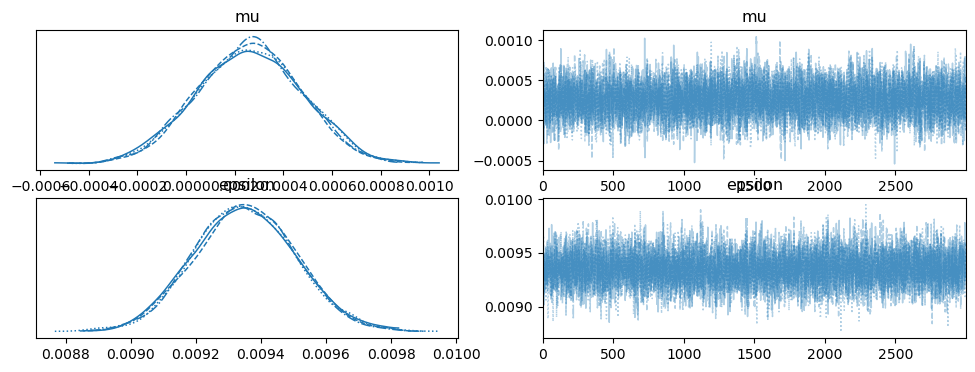

In [18]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az

# Assuming you've already loaded your data into a dataframe named df
ticker_data = df[df['Ticker'] == 'CORN']

# Calculate mean and standard deviation for the log return of this ticker
mu_prior_mean = ticker_data['log_return'].mean()
mu_prior_std = ticker_data['log_return'].std()

with pm.Model() as model:
    # Priors for unknown model parameters
    mu = pm.Normal('mu', mu=mu_prior_mean, sigma=mu_prior_std) # Changed 'sd' to 'sigma'
    epsilon = pm.HalfCauchy('epsilon', beta=10)
    
    # Likelihood (sampling distribution) of observations
    returns_obs = pm.Normal('returns_obs', mu=mu, sigma=epsilon, observed=ticker_data['log_return']) # Changed 'sd' to 'sigma'
    
    # Sampling from the model
    trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')
    
# Posterior Analysis
az.plot_trace(trace)

In [19]:
import arviz as az

# Generate the summary
summary = az.summary(trace, round_to=2)

# Print the summary
print(summary)

         mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6896.50   5908.44   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6240.59   5582.06   

         r_hat  
mu         1.0  
epsilon    1.0  


In [ ]:
# Basic setup , running for all tickers

In [20]:
import pymc as pm
import pandas as pd
import numpy as np
import arviz as az

# Load the data into a dataframe named df
# Assuming this is already done

# Get the unique tickers
tickers = df['Ticker'].unique()

# Dictionary to store results for each ticker
results = {}

for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker]
    
    # Calculate mean and standard deviation for the log return of the current ticker
    mu_prior_mean = ticker_data['log_return'].mean()
    mu_prior_std = ticker_data['log_return'].std()

    with pm.Model() as model:
        # Priors for unknown model parameters
        mu = pm.Normal('mu', mu=mu_prior_mean, sigma=mu_prior_std)  # Used 'sigma' instead of 'sd'
        epsilon = pm.HalfCauchy('epsilon', beta=10)
        
        # Likelihood (sampling distribution) of observations
        returns_obs = pm.Normal('returns_obs', mu=mu, sigma=epsilon, observed=ticker_data['log_return'])
        
        # Sampling from the model
        trace = pm.sample(draws=3000, tune=1500, target_accept=0.99, init='adapt_diag')

        # Generate the summary
        summary = az.summary(trace, round_to=2)
        results[ticker] = summary

# Now, you can print the summary for each ticker
for ticker, summary in results.items():
    print(f"\nResults for ticker {ticker}:\n", summary)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 60 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 50 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 46 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 56 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 47 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 53 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 54 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 48 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 45 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 51 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 45 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 57 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 66 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 62 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 65 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 68 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 69 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 71 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 78 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, epsilon]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 84 seconds.



Results for ticker CORN:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   5770.79   5409.06   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6135.44   5533.14   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker SOYB:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6435.77   5727.67   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   6682.93   5918.38   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker WEAT:
          mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu       0.00  0.0   -0.00     0.00        0.0      0.0   6438.63   5549.46   
epsilon  0.01  0.0    0.01     0.01        0.0      0.0   5647.09   5487.98   

         r_hat  
mu         1.0  
epsilon    1.0  

Results for ticker GLD:
          mean   sd  hdi_3%

In [ ]:
# Simple Model like BL model

    Mean (mu) of Returns:
        The mean return (mu) is very close to zero for all tickers, which implies that the expected daily return for each of the tickers is approximately zero. This is quite common for daily returns as stock prices tend to have random walk behavior.

    Volatility (epsilon):
        epsilon represents the volatility of the returns. It's evident that all the tickers have similar volatilities, mostly around 0.01 or 0.02. Volatility is a measure of the risk associated with the returns of an investment.

    Effective Sample Size (ess_bulk and ess_tail):
        These are used to determine the effectiveness of the Markov Chain Monte Carlo (MCMC) sampling. A higher value indicates that the MCMC sampling has been more effective. For all the tickers, these values are quite high (typically in the range of 5000 to 7000). This suggests that the sampling has been effective for all the tickers.

    R-hat (r_hat):
        The R-hat values are all 1.0, which is perfect. This statistic is used to check the convergence of the MCMC chains. A value of 1.0 suggests that the chains have converged well. If this value deviates from 1.0, it's an indicator that the chains haven't mixed well, and the results might not be reliable. Since all tickers have R-hat as 1.0, this means the results are reliable.

    Highest Posterior Density Interval (hdi_3% and hdi_97%):
        This represents the interval within which the true parameter value lies with a certain probability. In this case, for almost all tickers, both mu and epsilon have the interval very close to their mean values, implying that the model is quite certain about the estimates.

    Monte Carlo Standard Error (mcse_mean and mcse_sd):
        These are close to 0 for all the tickers, indicating that the Monte Carlo estimation of the posterior means and standard deviations are accurate.

    Mean (mu) of Returns:
        The mean return (mu) is very close to zero for all tickers, which implies that the expected daily return for each of the tickers is approximately zero. This is quite common for daily returns as stock prices tend to have random walk behavior.

    Volatility (epsilon):
        epsilon represents the volatility of the returns. It's evident that all the tickers have similar volatilities, mostly around 0.01 or 0.02. Volatility is a measure of the risk associated with the returns of an investment.

    Effective Sample Size (ess_bulk and ess_tail):
        These are used to determine the effectiveness of the Markov Chain Monte Carlo (MCMC) sampling. A higher value indicates that the MCMC sampling has been more effective. For all the tickers, these values are quite high (typically in the range of 5000 to 7000). This suggests that the sampling has been effective for all the tickers.

    R-hat (r_hat):
        The R-hat values are all 1.0, which is perfect. This statistic is used to check the convergence of the MCMC chains. A value of 1.0 suggests that the chains have converged well. If this value deviates from 1.0, it's an indicator that the chains haven't mixed well, and the results might not be reliable. Since all tickers have R-hat as 1.0, this means the results are reliable.

    Highest Posterior Density Interval (hdi_3% and hdi_97%):
        This represents the interval within which the true parameter value lies with a certain probability. In this case, for almost all tickers, both mu and epsilon have the interval very close to their mean values, implying that the model is quite certain about the estimates.

    Monte Carlo Standard Error (mcse_mean and mcse_sd):
        These are close to 0 for all the tickers, indicating that the Monte Carlo estimation of the posterior means and standard deviations are accurate.



In [21]:
import pymc as pm
import numpy as np

# Load the data and set up similarly as above
df = pd.read_excel('etf_ei_merged_data.xlsx')
train_pct = 0.8
train_size = int(train_pct * len(df))
df_train = df.iloc[:train_size]

prices = df_train.pivot(index='Date', columns='Ticker', values='Close')

# Map tickers to sector indices for the hierarchical model
unique_sectors = df_train['Sector'].unique().tolist()
ticker_to_sector = df_train[['Ticker', 'Sector']].drop_duplicates().set_index('Ticker').to_dict()['Sector']
sector_indices = [unique_sectors.index(ticker_to_sector[ticker]) for ticker in prices.columns]

n_sectors = len(unique_sectors)
n_tickers = len(prices.columns)

# Bayesian Hierarchical Model
with pm.Model() as bayesian_hierarchical_model:
    
    # Hyperpriors for sector return means and standard deviations
    mu_hyper_sd = pm.HalfCauchy('mu_hyper_sd', beta=1)
    mu_hyper_mu = pm.Normal('mu_hyper_mu', mu=0, sd=1)
    
    # Sector-level priors for return means
    sector_mu = pm.Normal('sector_mu', mu=mu_hyper_mu, sigma=mu_hyper_sd, shape=n_sectors)
    
    # Stock-level priors for return means (based on their sector)
    epsilon = pm.HalfCauchy('epsilon', beta=1, shape=n_tickers)
    stock_mu = pm.Normal('stock_mu', mu=sector_mu[sector_indices], sd=epsilon, shape=n_tickers)
    
    # Observations - daily returns
    stock_returns = pm.Normal('stock_returns', mu=stock_mu, sd=epsilon, observed=prices.pct_change().dropna().values)

with bayesian_hierarchical_model:
    for ticker, view_return in views.items():
        ticker_idx = prices.columns.tolist().index(ticker)
        pm.Normal(f'view_{ticker}', mu=view_return, sd=0.01, observed=stock_mu[ticker_idx])
        
with bayesian_hierarchical_model:
    trace = pm.sample(1000, tune=500)
    
pm.traceplot(trace)
pm.summary(trace)

TypeError: RandomVariable.make_node() got an unexpected keyword argument 'sd'

### Improvements 22_October_2023